In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
 

In [2]:
def gauss(x, A, mean, sig):
    '''
    Returns a Gaussian Profile
    '''
    gaussian = (A/(sig*np.sqrt(2*np.pi)))*np.exp(-pow((x-mean), 2.0)/(2*pow(sig, 2.0)))
    return gaussian

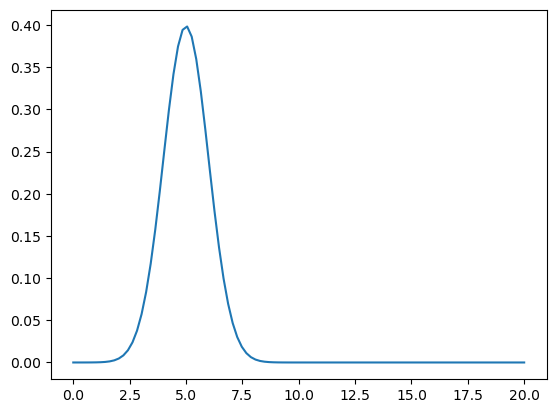

In [3]:
x_test = np.linspace(0,20, 100)
gauss_test = gauss(x_test, 1.0, 5, 1.0)

plt.plot(x_test, gauss_test)
plt.show()

In [4]:
def nonlinear_func_real(x_vals, amp1, amp2, m1, m2, w1, cont):
    '''
    Combines two gaussians into one simulated model spectrum
    '''
    return gauss(x_vals, amp1, m1, w1) + gauss(x_vals, amp2, m2, w1) + cont

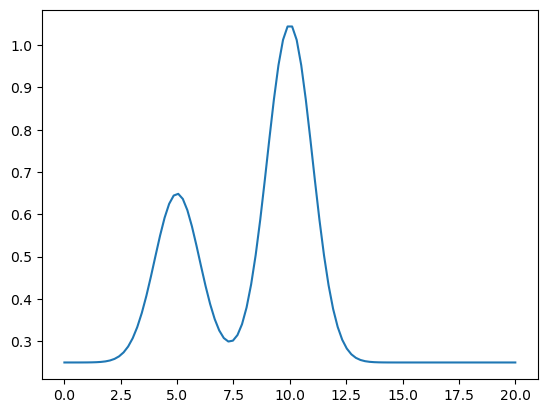

In [5]:
x_test2 = np.linspace(0,20, 100)
y_val_test = nonlinear_func_real(x_test2, 1.0, 2.0, 5, 10, 1.0, 0.25)
plt.plot(x_test2, y_val_test)
plt.show()

In [8]:
def fit_data(wave, spec, amp1, amp2, m1, m2, w1, cont):
    
    '''
    Fits 2 Gaussian profiles to a spectrum to determine the amplittudes, line centers, widths, and continum level of the input spectrum.
    '''
    
    print('=========================================')
    print('Performing a least squares fit...')

    popt, pcov = curve_fit(nonlinear_func_real, wave, spec, p0=[amp1, amp2, m1, m2, w1, cont])

    errs = np.sqrt(np.diag(pcov))
    print('=========================================')
    print('Printing out the best fitting parameters and 1 std errors...')
    print('-----------------------------------------')
    print('line 1 Amp: ' +str(popt[0])+ ' Amp_err: ' +str(errs[0])+'\n')
    print('line 2 Amp: ' +str(popt[1])+ ' Amp_err: ' +str(errs[1])+'\n')
    print('line 1 wavelength: ' + str(popt[2])+ 'Mean_4949_err: ' + str(errs[2])+'\n')
    print('line 1 wavelength: ' + str(popt[3])+ 'Mean_5007_err: ' + str(errs[3])+'\n')
    print('line width: ' + str(popt[4])+ 'Sigma_err: ' + str(errs[4])+'\n')
    print('Continuum level: ' + str(popt[5])+ ' Cont_err: ' +str(errs[5])+'\n')

    print('=========================================')
    print('Plotting the observed and modeled data...')
    y_model = nonlinear_func_real(wave, *popt)

    plt.plot(wave, spec, label='data')
    plt.plot(wave, y_model, label='model')
    plt.vlines(popt[2], ymin=0.0, ymax=spec.max(), linestyles='--', alpha=0.75, linewidth=1.0)
    plt.vlines(popt[3], ymin=0.0, ymax=spec.max(), linestyles='--', alpha=0.75, linewidth=1.0)

    plt.legend()
    plt.show()

    return popt, pcov

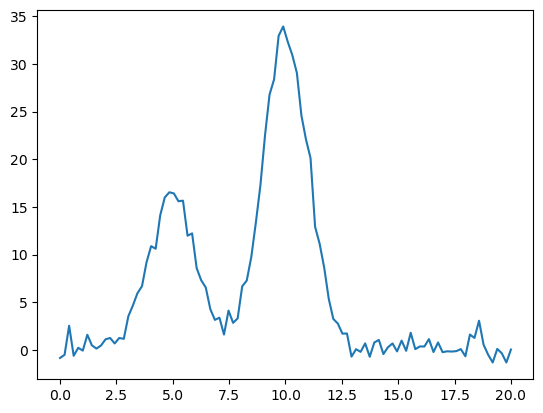

In [12]:
wave_test = np.linspace(0,20, 100)
pure_model = nonlinear_func_real(wave_test, 20.0, 40.0, 5, 10, 1.0, 0.25)
func_test_ = pure_model + np.random.normal(loc=pure_model, size=len(pure_model))

plt.plot(wave_test, func_test_)
plt.show()

Performing a least squares fit...
Printing out the best fitting parameters and 1 std errors...
-----------------------------------------
line 1 Amp: 40.51004826392246 Amp_err: 0.9505008977099503

line 2 Amp: 82.35959868557505 Amp_err: 1.1011259591438316

line 1 wavelength: 4.983749596435369Mean_4949_err: 0.026127534347778387

line 1 wavelength: 10.002788889372582Mean_5007_err: 0.012839289518362152

line width: 1.0017178468962868Sigma_err: 0.01251002702451312

Continuum level: 0.2905530508752576 Cont_err: 0.12336574463168029

Plotting the observed and modeled data...


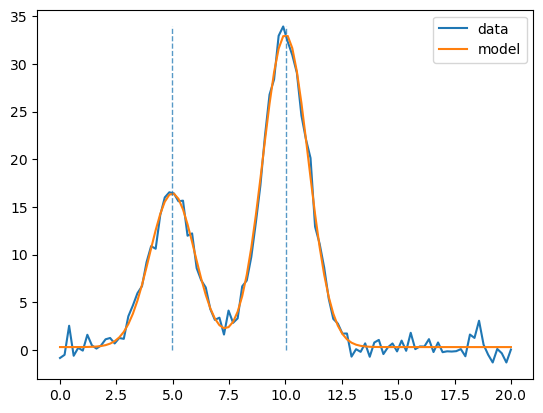

In [13]:
out_popt, out_pcov = fit_data(wave_test, func_test_, 18, 33, 4.5, 9.5, 1.5, 0.5)

In [14]:
def get_redshift(lamo, lame):
    '''
    return to redshift of a source given the observed and rest frame wavelengths
    '''
    return (lamo-lame)/lame

In [15]:
get_redshift(5007, 5007)

0.0

In [16]:
from astropy.io import fits
import scipy.signal

In [53]:
loey = fits.open(r'D:\Documents\spec-0532-51993-0497.fits')
print(loey[1].columns)

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)


In [55]:
loey[2].columns

ColDefs(
    name = 'SURVEY'; format = '6A'
    name = 'INSTRUMENT'; format = '4A'
    name = 'CHUNK'; format = '16A'
    name = 'PROGRAMNAME'; format = '23A'
    name = 'PLATERUN'; format = '16A'
    name = 'PLATEQUALITY'; format = '8A'
    name = 'PLATESN2'; format = 'E'
    name = 'DEREDSN2'; format = 'E'
    name = 'LAMBDA_EFF'; format = 'E'
    name = 'BLUEFIBER'; format = 'J'
    name = 'ZOFFSET'; format = 'E'
    name = 'SNTURNOFF'; format = 'E'
    name = 'NTURNOFF'; format = 'J'
    name = 'SPECPRIMARY'; format = 'B'
    name = 'SPECLEGACY'; format = 'B'
    name = 'SPECSEGUE'; format = 'B'
    name = 'SPECSEGUE1'; format = 'B'
    name = 'SPECSEGUE2'; format = 'B'
    name = 'SPECBOSS'; format = 'B'
    name = 'BOSS_SPECOBJ_ID'; format = 'J'
    name = 'SPECOBJID'; format = '22A'
    name = 'FLUXOBJID'; format = '19A'
    name = 'BESTOBJID'; format = '19A'
    name = 'TARGETOBJID'; format = '22A'
    name = 'PLATEID'; format = '19A'
    name = 'NSPECOBS'; format = 'I'
    nam

In [74]:
z_value = loey[2].data['Z']
print(z_value)

[0.30948576]


In [76]:
spec = loey[1].data['flux']
waves = 10**loey[1].data['loglam']

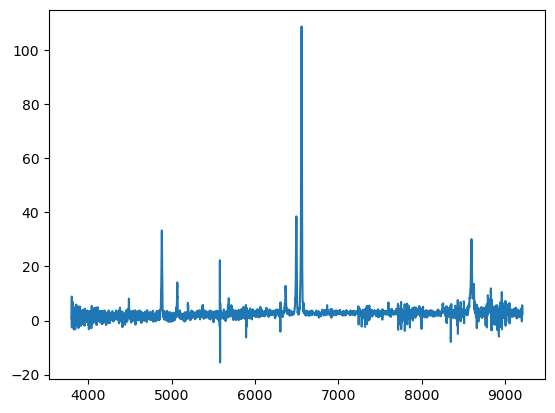

In [78]:
plt.plot(waves, spec)
plt.show()

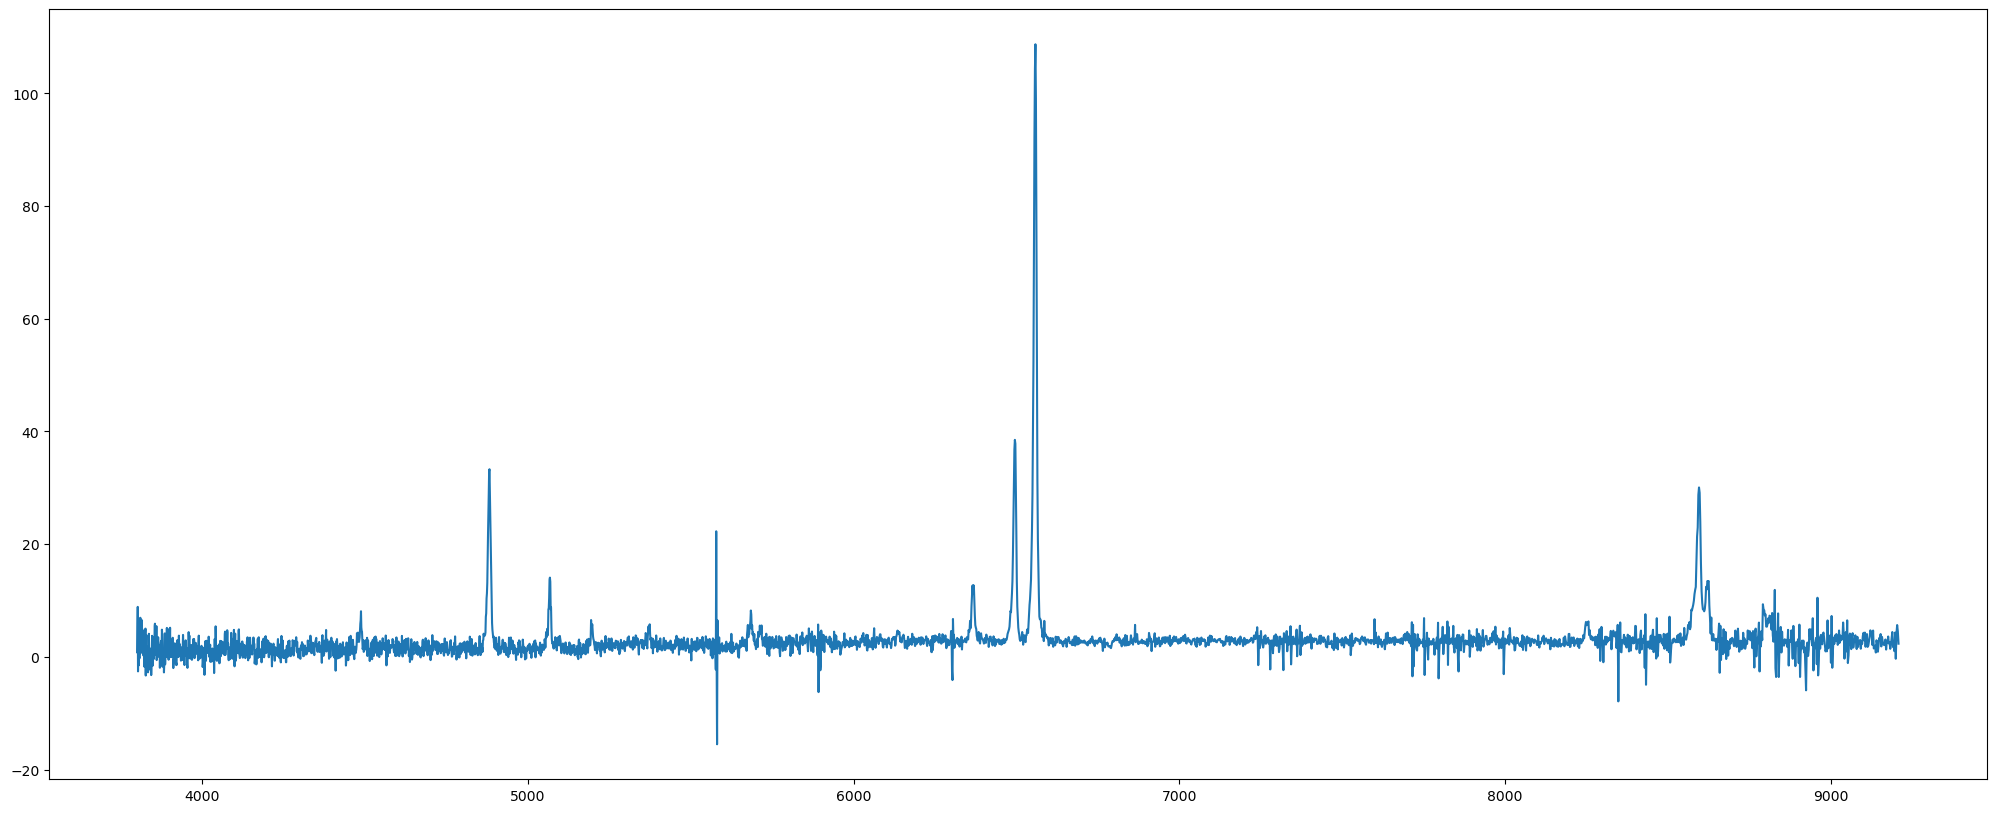

In [80]:
fig = plt.figure()
fig.set_size_inches(25,10)
plt.plot(waves, spec)
plt.show()

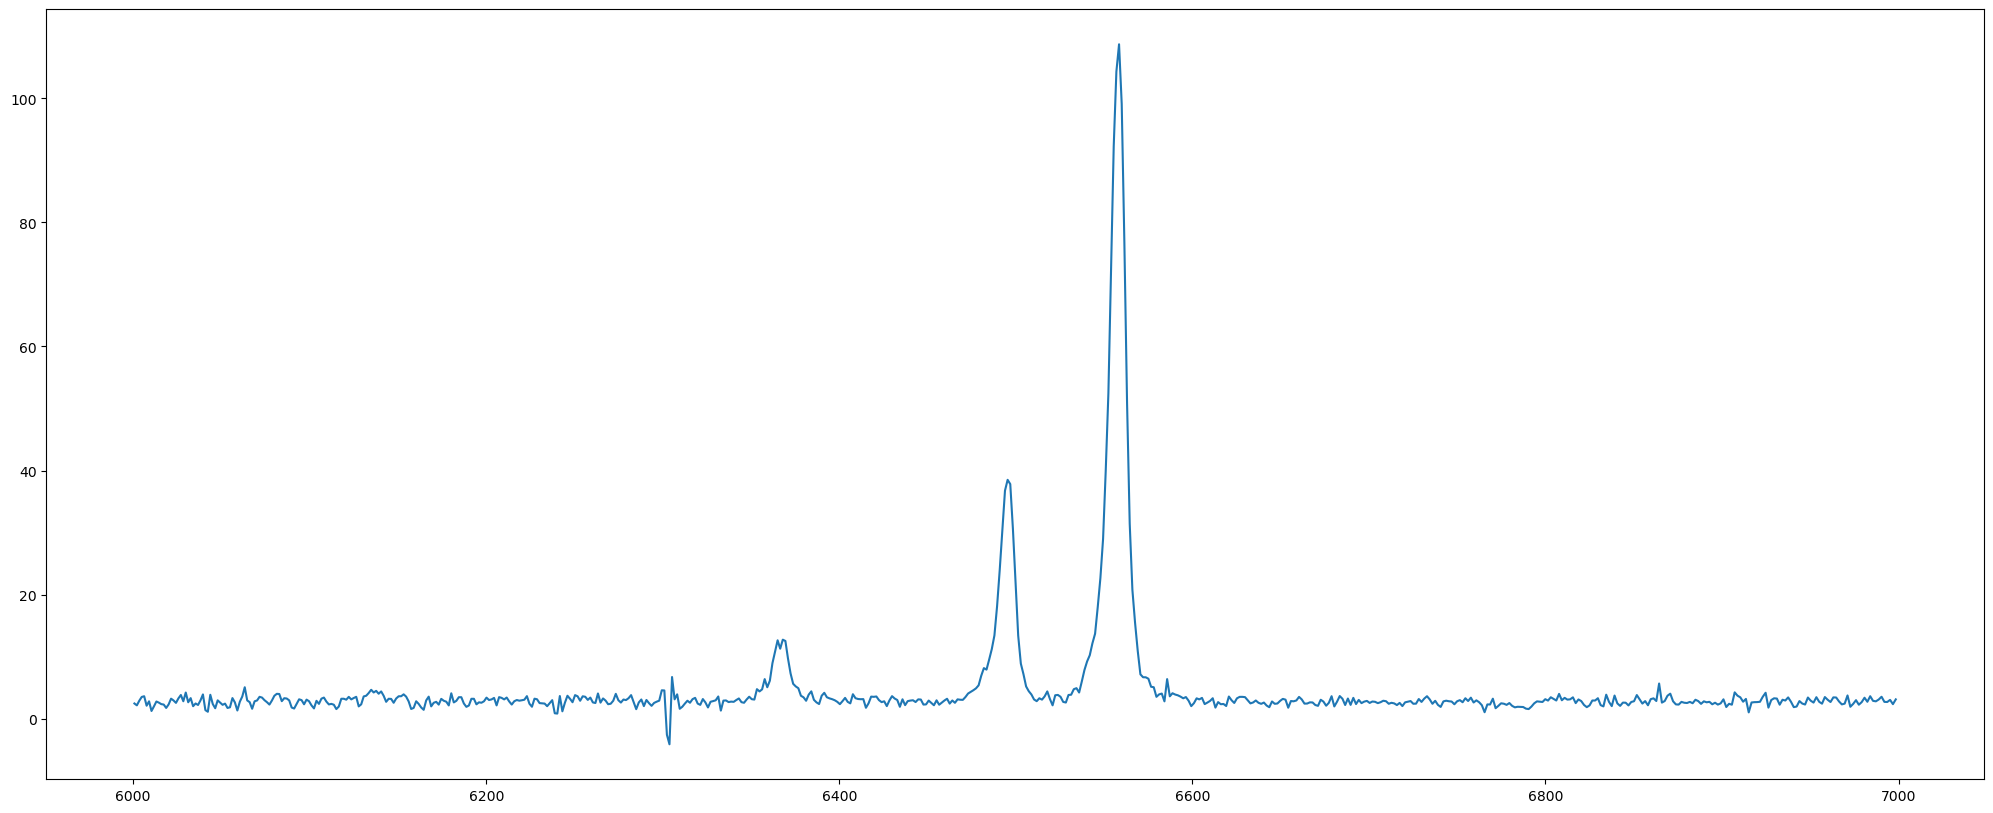

In [82]:
sub_i = np.where((waves>6000) & (waves <7000))
sub_spec = spec[sub_i]
sub_wave = waves[sub_i]

fig = plt.figure()
fig.set_size_inches(25,10)
plt.plot(sub_wave, sub_spec)
plt.show()

In [84]:
spec_peaks = scipy.signal.find_peaks(sub_spec, height=35)[0]
print(sub_wave[spec_peaks])

[6495.31   6558.4336]


Performing a least squares fit...
Printing out the best fitting parameters and 1 std errors...
-----------------------------------------
line 1 Amp: 399.4511480991233 Amp_err: 8.283153548901659

line 2 Amp: 1194.7858091389219 Amp_err: 9.806712151579767

line 1 wavelength: 6494.935596028868Mean_4949_err: 0.13188075271895844

line 1 wavelength: 6557.590189869988Mean_5007_err: 0.04430205220819714

line width: 4.663898409092399Sigma_err: 0.04228522535186696

Continuum level: 3.106200887904923 Cont_err: 0.06357843151367389

Plotting the observed and modeled data...


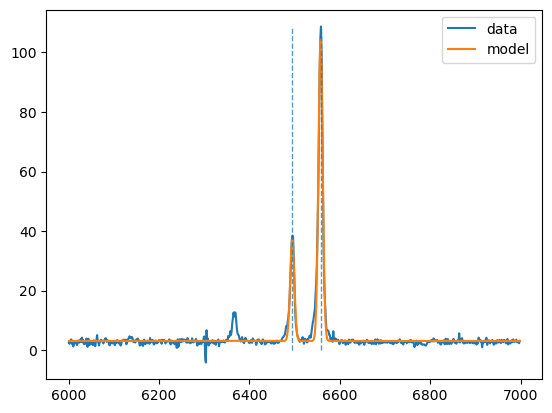

In [87]:
popt_, pcov_= fit_data(sub_wave, sub_spec, 40, 130, *sub_wave[spec_peaks], 5.0, 4.0)

In [89]:
wv_4959_e = 495.9
wv_5007_e = 500.7

src_redshift1 = get_redshift(popt_[2], wv_4959_e)
print(src_redshift1)

src_redshift2 = get_redshift(popt_[3], wv_5007_e)
print(src_redshift2)

12.097268796186466
12.096844797024142


In [91]:
def ketidakpastian_redshift(lamo, lame, sigma_lamo):
    '''
    Menghitung ketidakpastian redshift berdasarkan ketidakpastian panjang gelombang terobservasi
    '''
    return sigma_lamo / lame

sigma_lam1 = np.sqrt(pcov_[2, 2]) 
sigma_lam2 = np.sqrt(pcov_[3, 3])

src_redshift1_ketidakpastian = ketidakpastian_redshift(popt_[2], wv_4959_e, sigma_lam1)
src_redshift2_ketidakpastian= ketidakpastian_redshift(popt_[3], wv_5007_e, sigma_lam2)

print(f'Redshift 1: {src_redshift1} ± {src_redshift1_ketidakpastian}')
print(f'Redshift 2: {src_redshift2} ± {src_redshift2_ketidakpastian}')

Redshift 1: 12.097268796186466 ± 0.00026594223173816985
Redshift 2: 12.096844797024142 ± 8.848023209146624e-05
